In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('instagram_reach.csv')

In [3]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.shape

(100, 7)

In [6]:
data.drop('S.No',axis=1,inplace=True)

In [7]:
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


C:\Users\k.vidya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


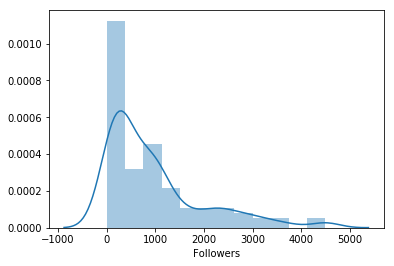

In [8]:
sns.distplot(data['Followers'])
plt.show()

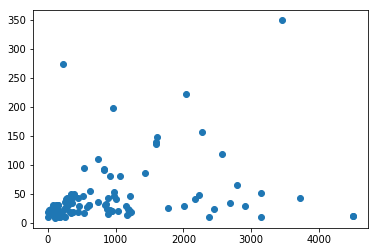

In [9]:
plt.scatter(data=data,x='Followers',y='Likes')
plt.show()

In [10]:
data['Time since posted'] = data['Time since posted'].str.replace('hours','').astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
USERNAME             100 non-null object
Caption              94 non-null object
Followers            100 non-null int64
Hashtags             100 non-null object
Time since posted    100 non-null int32
Likes                100 non-null int64
dtypes: int32(1), int64(2), object(3)
memory usage: 4.4+ KB


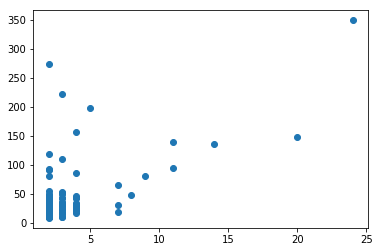

In [12]:
plt.scatter(data=data,x='Time since posted',y='Likes')
plt.show()

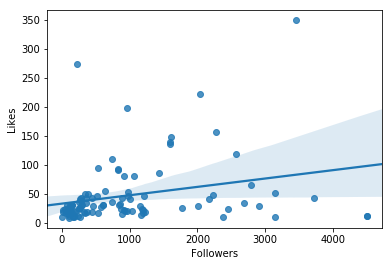

In [26]:
sns.regplot(data=data,x='Followers',y='Likes')
plt.show()

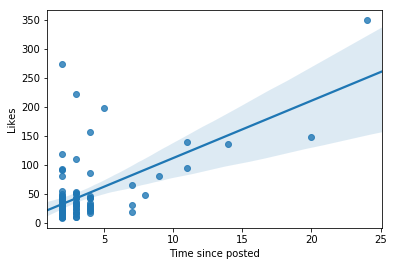

In [27]:
sns.regplot(data=data,x='Time since posted',y='Likes')
plt.show()

In [28]:
x=data[['Followers','Time since posted']]
y=data[['Likes']]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [34]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(f"the accuracy of the model is : {score}")

the accuracy of the model is : 0.6213039038816615
